ORDER AMOUNT PREDICTION: Building a Machine Learning model to predict the order amount that customers can place in the upcoming days. 

MILESTONE 1 - DATA SANITY

We are importing necessary libraries for milestone 1

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1). Use the PRS dataset to create a dataframe

In [63]:
#By using pandas, we can read data from any type of data set
df = pd.read_csv('Final.csv')
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                   20220101                43012                SR02   
1                   20220101                43114                NR03   
2                   20220101               110019                NR01   
3                   20220101               153013                SR02   
4                   20220101               160020                SR01   
...                      ...                  ...                 ...   
1101920             20220601                74357                NR02   
1101921             20220601                84052                NR04   
1101922             20220601                85322                NR01   
1101923             20220601                90538                SR04   
1101924             20220601               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61                 20220113            EUR   
1            798847812       787,36                 20220111            EUR   
2            960984659     67493,46                 20220112            EUR   
3            925857642      1405,54                 20220106            EUR   
4            947942786         0,00                 20220106            EUR   
...                ...          ...                      ...            ...   
1101920      946056501      4415,19                 20220601            SGD   
1101921      894775488         0,00                 20220601            SGD   
1101922      909729781         0,00                 20220601            SGD   
1101923      940836817         0,00                 20220601            SGD   
1101924      754385277      4415,19                 20220601            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN     

2). CHECK THE DESCRIPTION OF THE DATAFRAME

In [64]:
description = df.describe(include='all')
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                   20220101                43012                SR02   
1                   20220101                43114                NR03   
2                   20220101               110019                NR01   
3                   20220101               153013                SR02   
4                   20220101               160020                SR01   
...                      ...                  ...                 ...   
1101920             20220601                74357                NR02   
1101921             20220601                84052                NR04   
1101922             20220601                85322                NR01   
1101923             20220601                90538                SR04   
1101924             20220601               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61                 20220113            EUR   
1            798847812       787,36                 20220111            EUR   
2            960984659     67493,46                 20220112            EUR   
3            925857642      1405,54                 20220106            EUR   
4            947942786         0,00                 20220106            EUR   
...                ...          ...                      ...            ...   
1101920      946056501      4415,19                 20220601            SGD   
1101921      894775488         0,00                 20220601            SGD   
1101922      909729781         0,00                 20220601            SGD   
1101923      940836817         0,00                 20220601            SGD   
1101924      754385277      4415,19                 20220601            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN     

3). CHECK THE SHAPE OF DATAFRAME

In [65]:
shape = df.shape
print(shape)

(1101925, 16)


4). CHECK THE DATA FRAME INFORMATIONS

In [66]:
df.info()
#all the information related to each column and it's values are presented here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

5). CHECK FOR THE NULL VALUES IN THE DATAFRAME

In [67]:
df.isnull()
#this will return boolean values

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                    False      False                 False     False   
1                    False      False                 False     False   
2                    False      False                 False     False   
3                    False      False                 False     False   
4                    False      False                 False     False   
...                    ...        ...                   ...       ...   
1101920              False      False                 False     False   
1101921              False      False                 False     False   
1101922              False      False                 False     False   
1101923              False      False                 False     False   
1101924              False      False                 False     False   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        False                False         False   
1                        False                False         False   
2                        False                False         False   
3                        False                False         False   
4                        False                False         False   
...                        ...                  ...           ...   
1101920                  False                 True         False   
1101921                  False                 True         False   
1101922                  False                 True         False   
1101923                  False                 True         False   
1101924                  False                 True         False   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  \
0                      False                False                False   
1                      False                False                False   
2                      False                False                False   
3                      False                False                False   
4                      False                False                False   
...                      ...                  ...                  ...   
1101920                False                False                False   
1101921                False                False                False   
1101922                False                False                False   
1101923                False                False                False   
1101924                False                False                False   

         SOLD_TO_PARTY  ORDER_AMOUNT  REQUESTED_DELIVERY_DATE  ORDER_CURRENCY  \
0                False         False                    False           False   
1                False         False                    False           False   
2                False         False                    False           False   
3                False         False                    False           False   
4                False         False                    False           False   
...                ...           ...                      ...             ...   
1101920          False         False                    False           False   
1101921          False         False                    False           False   
1101922          False         False                    False           False   
1101923          False         False                    False           False   
1101924          False         False                    False           False   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                 True            False  
1                 True            False  
2                False            False  
3                False            False  
4                False            False  
...                ...              ...  
1101920           True            False  
1101921           True            False  
1101922           True            False  
1101923           Tru

6). REPLACE ALL THE NULL VALUES WITH "NaN"

In [68]:
df.fillna(np.nan)
#here we are supposed to fill all NULL values with NaN(Not a Number)

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                   20220101                43012                SR02   
1                   20220101                43114                NR03   
2                   20220101               110019                NR01   
3                   20220101               153013                SR02   
4                   20220101               160020                SR01   
...                      ...                  ...                 ...   
1101920             20220601                74357                NR02   
1101921             20220601                84052                NR04   
1101922             20220601                85322                NR01   
1101923             20220601                90538                SR04   
1101924             20220601               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61                 20220113            EUR   
1            798847812       787,36                 20220111            EUR   
2            960984659     67493,46                 20220112            EUR   
3            925857642      1405,54                 20220106            EUR   
4            947942786         0,00                 20220106            EUR   
...                ...          ...                      ...            ...   
1101920      946056501      4415,19                 20220601            SGD   
1101921      894775488         0,00                 20220601            SGD   
1101922      909729781         0,00                 20220601            SGD   
1101923      940836817         0,00                 20220601            SGD   
1101924      754385277      4415,19                 20220601            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN     

7). Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"


As we can see in our table that ORDER CREATION DATE is not in format and is difficult to understand. So, we use format in-built function to obtain a better and understandable date format.

In [69]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61                 20220113            EUR   
1            798847812       787,36                 20220111            EUR   
2            960984659     67493,46                 20220112            EUR   
3            925857642      1405,54                 20220106            EUR   
4            947942786         0,00                 20220106            EUR   
...                ...          ...                      ...            ...   
1101920      946056501      4415,19                 20220601            SGD   
1101921      894775488         0,00                 20220601            SGD   
1101922      909729781         0,00                 20220601            SGD   
1101923      940836817         0,00                 20220601            SGD   
1101924      754385277      4415,19                 20220601            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN       1210331811

8). Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"


In [70]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61              2022-01-13            EUR   
1            798847812       787,36              2022-01-11            EUR   
2            960984659     67493,46              2022-01-12            EUR   
3            925857642      1405,54              2022-01-06            EUR   
4            947942786         0,00              2022-01-06            EUR   
...                ...          ...                     ...            ...   
1101920      946056501      4415,19              2022-06-01            SGD   
1101921      894775488         0,00              2022-06-01            SGD   
1101922      909729781         0,00              2022-06-01            SGD   
1101923      940836817         0,00              2022-06-01            SGD   
1101924      754385277      4415,19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN       1210331811  
1101923  

9). Sanity check - Check how many records are having order date greater than the delivery date

In [71]:
count = (df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum()

print("Number of records with order date greater than delivery date:", count)

Number of records with order date greater than delivery date: 27142


10). Remove those records where order date is greater than the delivery date 

As per out data sanity procedure done previously, we need to remove those records where REQUEST DELIVERY DATE is greater than ORDER CREATION DATE so as to obtain a clear and much clean dataset.

In [72]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61              2022-01-13            EUR   
1            798847812       787,36              2022-01-11            EUR   
2            960984659     67493,46              2022-01-12            EUR   
3            925857642      1405,54              2022-01-06            EUR   
4            947942786         0,00              2022-01-06            EUR   
...                ...          ...                     ...            ...   
1101920      946056501      4415,19              2022-06-01            SGD   
1101921      894775488         0,00              2022-06-01            SGD   
1101922      909729781         0,00              2022-06-01            SGD   
1101923      940836817         0,00              2022-06-01            SGD   
1101924      754385277      4415,19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN       1210331811  
1101923  

11). Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [73]:
count = df['ORDER_AMOUNT'].str.contains('-').sum()

print("Number of records with '-' in ORDER_AMOUNT field:", count)

Number of records with '-' in ORDER_AMOUNT field: 32


12). Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [74]:
df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace('-', '')
count = df['ORDER_AMOUNT'].str.contains('-').sum()
print("Number of records with '-' in ORDER_AMOUNT after replacment: ", count)
df.head()

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\2102630490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace('-', '')


Number of records with '-' in ORDER_AMOUNT after replacment:  0


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0          946851639       3537  United States of America  South-Region   
1          963432061       3449                Martinique  South-Region   
2          971991639       3238                   Moldova  South-Region   
3          754349803       3911      United Arab Emirates  South-Region   
4          930253442       2381                    Greece  South-Region   

  RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE ORDER_CREATION_DATE  \
0                  0,00                1000          3220          2022-01-01   
1                  0,00                1000          3220          2022-01-01   
2              82342,02                I200          3260          2022-01-01   
3               1471,24                N000          3290          2022-01-01   
4                  0,00                N000          3290          2022-01-01   

   ORDER_CREATION_TIME CREDIT_CONTROL_AREA  SOLD_TO_PARTY ORDER_AMOUNT  \
0                43012                SR02      756141537       954,61   
1                43114                NR03      798847812       787,36   
2               110019                NR01      960984659     67493,46   
3               153013                SR02      925857642      1405,54   
4               160020                SR01      947942786         0,00   

  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  CREDIT_STATUS  CUSTOMER_NUMBER  
0              2022-01-13            EUR            NaN         12311807  
1              2022-01-11            EUR            NaN         12311807  
2              2022-01-12            EUR           93.0         12118758  
3              2022-01-06            EUR           93.0       1210499770  
4              2022-01-06            EUR           64.0       1210351400

13). Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..


In [75]:
count = df['ORDER_AMOUNT'].str.contains(',', na=False).sum()

print("Number of records with ',' in ORDER_AMOUNT field:", count)
df.head()

Number of records with ',' in ORDER_AMOUNT field: 1073406


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0          946851639       3537  United States of America  South-Region   
1          963432061       3449                Martinique  South-Region   
2          971991639       3238                   Moldova  South-Region   
3          754349803       3911      United Arab Emirates  South-Region   
4          930253442       2381                    Greece  South-Region   

  RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE ORDER_CREATION_DATE  \
0                  0,00                1000          3220          2022-01-01   
1                  0,00                1000          3220          2022-01-01   
2              82342,02                I200          3260          2022-01-01   
3               1471,24                N000          3290          2022-01-01   
4                  0,00                N000          3290          2022-01-01   

   ORDER_CREATION_TIME CREDIT_CONTROL_AREA  SOLD_TO_PARTY ORDER_AMOUNT  \
0                43012                SR02      756141537       954,61   
1                43114                NR03      798847812       787,36   
2               110019                NR01      960984659     67493,46   
3               153013                SR02      925857642      1405,54   
4               160020                SR01      947942786         0,00   

  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  CREDIT_STATUS  CUSTOMER_NUMBER  
0              2022-01-13            EUR            NaN         12311807  
1              2022-01-11            EUR            NaN         12311807  
2              2022-01-12            EUR           93.0         12118758  
3              2022-01-06            EUR           93.0       1210499770  
4              2022-01-06            EUR           64.0       1210351400

14). Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [76]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')
df['ORDER_AMOUNT']=pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
print("Number of records with ',' in ORDER_AMOUNT: ", count)
df.head()

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\996706902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')


Number of records with ',' in ORDER_AMOUNT:  1073406


C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\996706902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_AMOUNT']=pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0          946851639       3537  United States of America  South-Region   
1          963432061       3449                Martinique  South-Region   
2          971991639       3238                   Moldova  South-Region   
3          754349803       3911      United Arab Emirates  South-Region   
4          930253442       2381                    Greece  South-Region   

  RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE ORDER_CREATION_DATE  \
0                  0,00                1000          3220          2022-01-01   
1                  0,00                1000          3220          2022-01-01   
2              82342,02                I200          3260          2022-01-01   
3               1471,24                N000          3290          2022-01-01   
4                  0,00                N000          3290          2022-01-01   

   ORDER_CREATION_TIME CREDIT_CONTROL_AREA  SOLD_TO_PARTY  ORDER_AMOUNT  \
0                43012                SR02      756141537        954.61   
1                43114                NR03      798847812        787.36   
2               110019                NR01      960984659      67493.46   
3               153013                SR02      925857642       1405.54   
4               160020                SR01      947942786          0.00   

  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  CREDIT_STATUS  CUSTOMER_NUMBER  
0              2022-01-13            EUR            NaN         12311807  
1              2022-01-11            EUR            NaN         12311807  
2              2022-01-12            EUR           93.0         12118758  
3              2022-01-06            EUR           93.0       1210499770  
4              2022-01-06            EUR           64.0       1210351400

15). Count the number of records where the order date and the delivery date are same

In [77]:
count_same_dates = (df['ORDER_CREATION_DATE'].dt.date == df['REQUESTED_DELIVERY_DATE'].dt.date).sum()
print("The number of records where the order date and the delivery date are same : ", count_same_dates)

The number of records where the order date and the delivery date are same :  100437


In [78]:
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].str.replace(',','.')
df['RELEASED_CREDIT_VALUE'] = pd.to_numeric(df['RELEASED_CREDIT_VALUE'], errors='coerce')

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\4196174847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].str.replace(',','.')
C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\4196174847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RELEASED_CREDIT_VALUE'] = pd.to_numeric(df['RELEASED_CREDIT_VALUE'], errors='coerce')


16). Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [79]:
currency_counts = df['ORDER_CURRENCY'].value_counts()
print(currency_counts)

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


17). Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [80]:
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

df['AMOUNT_IN_USD'] = np.where(df['ORDER_CURRENCY'] != 'USD',
                               df['ORDER_AMOUNT'].astype(float) * df['ORDER_CURRENCY'].map(conversion_rates),
                               df['ORDER_AMOUNT'].astype(float))
df

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\1096155956.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMOUNT_IN_USD'] = np.where(df['ORDER_CURRENCY'] != 'USD',


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

         RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                         0.00                1000          3220   
1                         0.00                1000          3220   
2                     82342.02                I200          3260   
3                      1471.24                N000          3290   
4                         0.00                N000          3290   
...                        ...                 ...           ...   
1101920                   0.00                 NaN          4260   
1101921                   0.00                 NaN          4260   
1101922                   0.00                 NaN          4260   
1101923                   0.00                 NaN          4260   
1101924                   0.00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY  ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537        954.61              2022-01-13            EUR   
1            798847812        787.36              2022-01-11            EUR   
2            960984659      67493.46              2022-01-12            EUR   
3            925857642       1405.54              2022-01-06            EUR   
4            947942786          0.00              2022-01-06            EUR   
...                ...           ...                     ...            ...   
1101920      946056501       4415.19              2022-06-01            SGD   
1101921      894775488          0.00              2022-06-01            SGD   
1101922      909729781          0.00              2022-06-01            SGD   
1101923      940836817          0.00              2022-06-01            SGD   
1101924      754385277       4415.19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  AMOUNT_IN_USD  
0                  NaN         12311807      1030.9788  
1                  NaN         12311807       850.3488  
2                 93.0         12118758     72892.9368  
3                 93.0       1210499770      1517.9832  
4                 64.0       1210351400         0.0000  
...                ...              ...            ...  
110192

18). Check for values “0” in the “'amount_in_usd” column. 

In [81]:
count_zero_amounts=len(df[df['AMOUNT_IN_USD']==0])
print('Number of records with amount zero in USD: ', count_zero_amounts)

Number of records with amount zero in USD:  237821


19). Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [82]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str)+df['COMPANY_CODE'].astype(str)
df.head()

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\2195182295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str)+df['COMPANY_CODE'].astype(str)


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0          946851639       3537  United States of America  South-Region   
1          963432061       3449                Martinique  South-Region   
2          971991639       3238                   Moldova  South-Region   
3          754349803       3911      United Arab Emirates  South-Region   
4          930253442       2381                    Greece  South-Region   

   RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                   0.00                1000          3220   
1                   0.00                1000          3220   
2               82342.02                I200          3260   
3                1471.24                N000          3290   
4                   0.00                N000          3290   

  ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  SOLD_TO_PARTY  \
0          2022-01-01                43012                SR02      756141537   
1          2022-01-01                43114                NR03      798847812   
2          2022-01-01               110019                NR01      960984659   
3          2022-01-01               153013                SR02      925857642   
4          2022-01-01               160020                SR01      947942786   

   ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  CREDIT_STATUS  \
0        954.61              2022-01-13            EUR            NaN   
1        787.36              2022-01-11            EUR            NaN   
2      67493.46              2022-01-12            EUR           93.0   
3       1405.54              2022-01-06            EUR           93.0   
4          0.00              2022-01-06            EUR           64.0   

   CUSTOMER_NUMBER  AMOUNT_IN_USD  unique_cust_id  
0         12311807      1030.9788    123118073220  
1         12311807       850.3488    123118073220  
2         12118758     72892.9368    121187583260  
3       1210499770      1517.9832  12104997703290  
4       1210351400         0.0000  12103514003290

Here you will see the final dataset with all necessary changes as required by the company.

In [83]:
print("Final DataFrame with all necessary changes: ")
df

Final DataFrame with all necessary changes: 


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

         RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                         0.00                1000          3220   
1                         0.00                1000          3220   
2                     82342.02                I200          3260   
3                      1471.24                N000          3290   
4                         0.00                N000          3290   
...                        ...                 ...           ...   
1101920                   0.00                 NaN          4260   
1101921                   0.00                 NaN          4260   
1101922                   0.00                 NaN          4260   
1101923                   0.00                 NaN          4260   
1101924                   0.00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY  ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537        954.61              2022-01-13            EUR   
1            798847812        787.36              2022-01-11            EUR   
2            960984659      67493.46              2022-01-12            EUR   
3            925857642       1405.54              2022-01-06            EUR   
4            947942786          0.00              2022-01-06            EUR   
...                ...           ...                     ...            ...   
1101920      946056501       4415.19              2022-06-01            SGD   
1101921      894775488          0.00              2022-06-01            SGD   
1101922      909729781          0.00              2022-06-01            SGD   
1101923      940836817          0.00              2022-06-01            SGD   
1101924      754385277       4415.19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  AMOUNT_IN_USD  unique_cust_id  
0                  NaN         12311807      1030.9788    123118073220  
1                  NaN         12311807       850.3488    123118073220  
2                 93.0         12118758     72892.9368    121187583260  
3                 93.0       1210499770      1517.9832  12104997703290  
4                 64.0       1210351400 

MILESTONE 2

1). Create a Histogram on DISTRIBUTION_CHANNEL

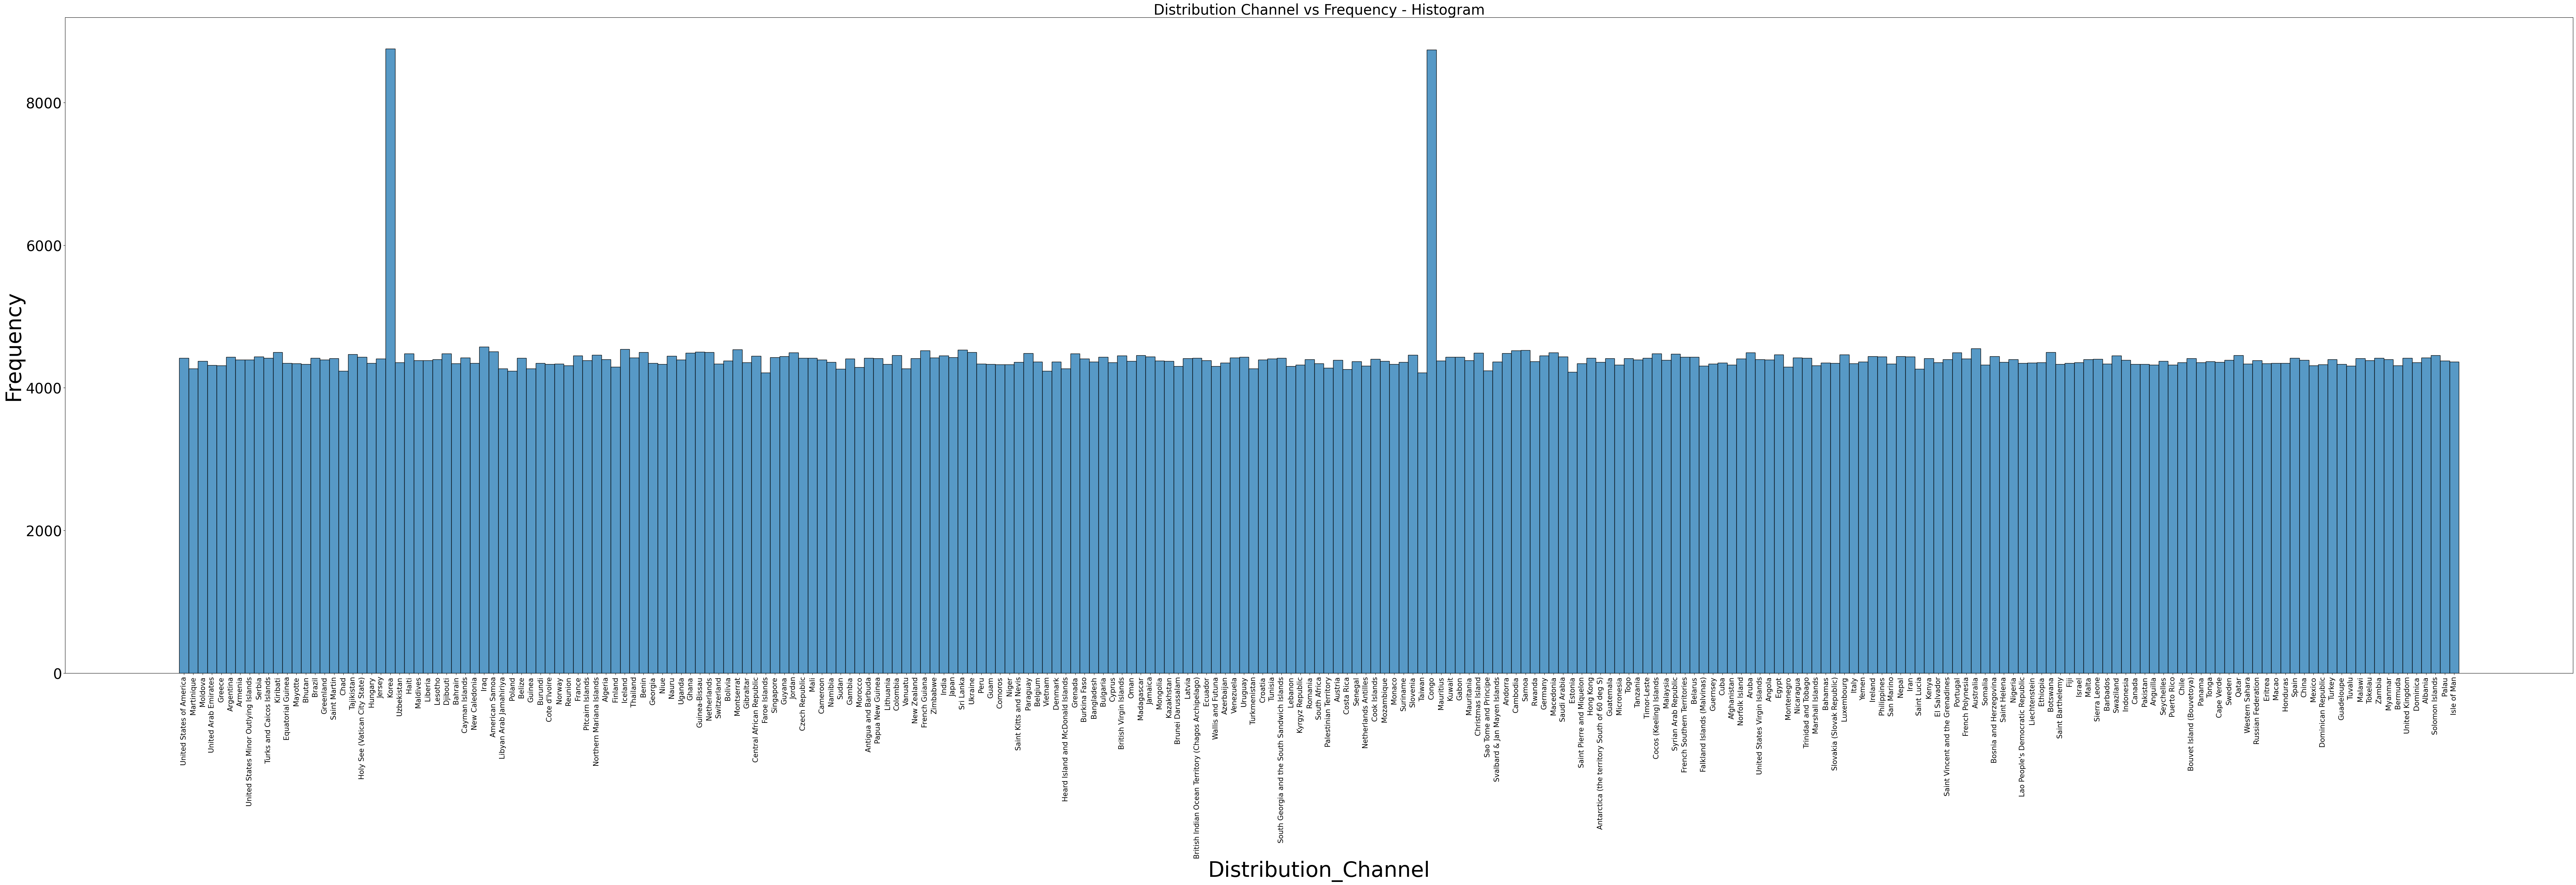

In [84]:
plt.figure(figsize=(95, 25))
plt.title("Distribution Channel vs Frequency - Histogram", fontsize=30)

plt.xticks(fontsize = 15, rotation=90)
plt.yticks(fontsize = 30)
plt.xlabel("Distribution_Channel", fontsize=45)
plt.ylabel("Frequency", fontsize=45)

sns.histplot(x = "DISTRIBUTION_CHANNEL", data = df)

plt.show()

2). Create a Pie Chart on ORDER_CURRENCY

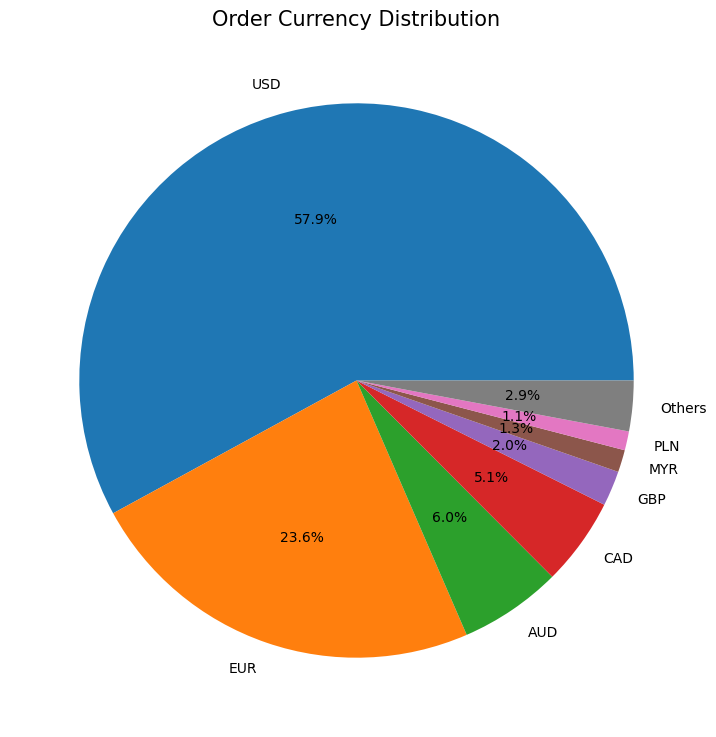

In [85]:
curr_counts = df['ORDER_CURRENCY'].value_counts()
curr_percent = curr_counts / curr_counts.sum()

other_curr = curr_percent[curr_percent < 0.01]
other_curr_sum = other_curr.sum()
curr_data = curr_percent[~(curr_percent < 0.01)]
curr_data['Others'] = other_curr_sum

plt.figure(figsize=(10, 9))
plt.pie(curr_data, labels=curr_data.index, autopct='%1.1f%%')

plt.title('Order Currency Distribution', fontsize=15)
plt.show()

3). Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL


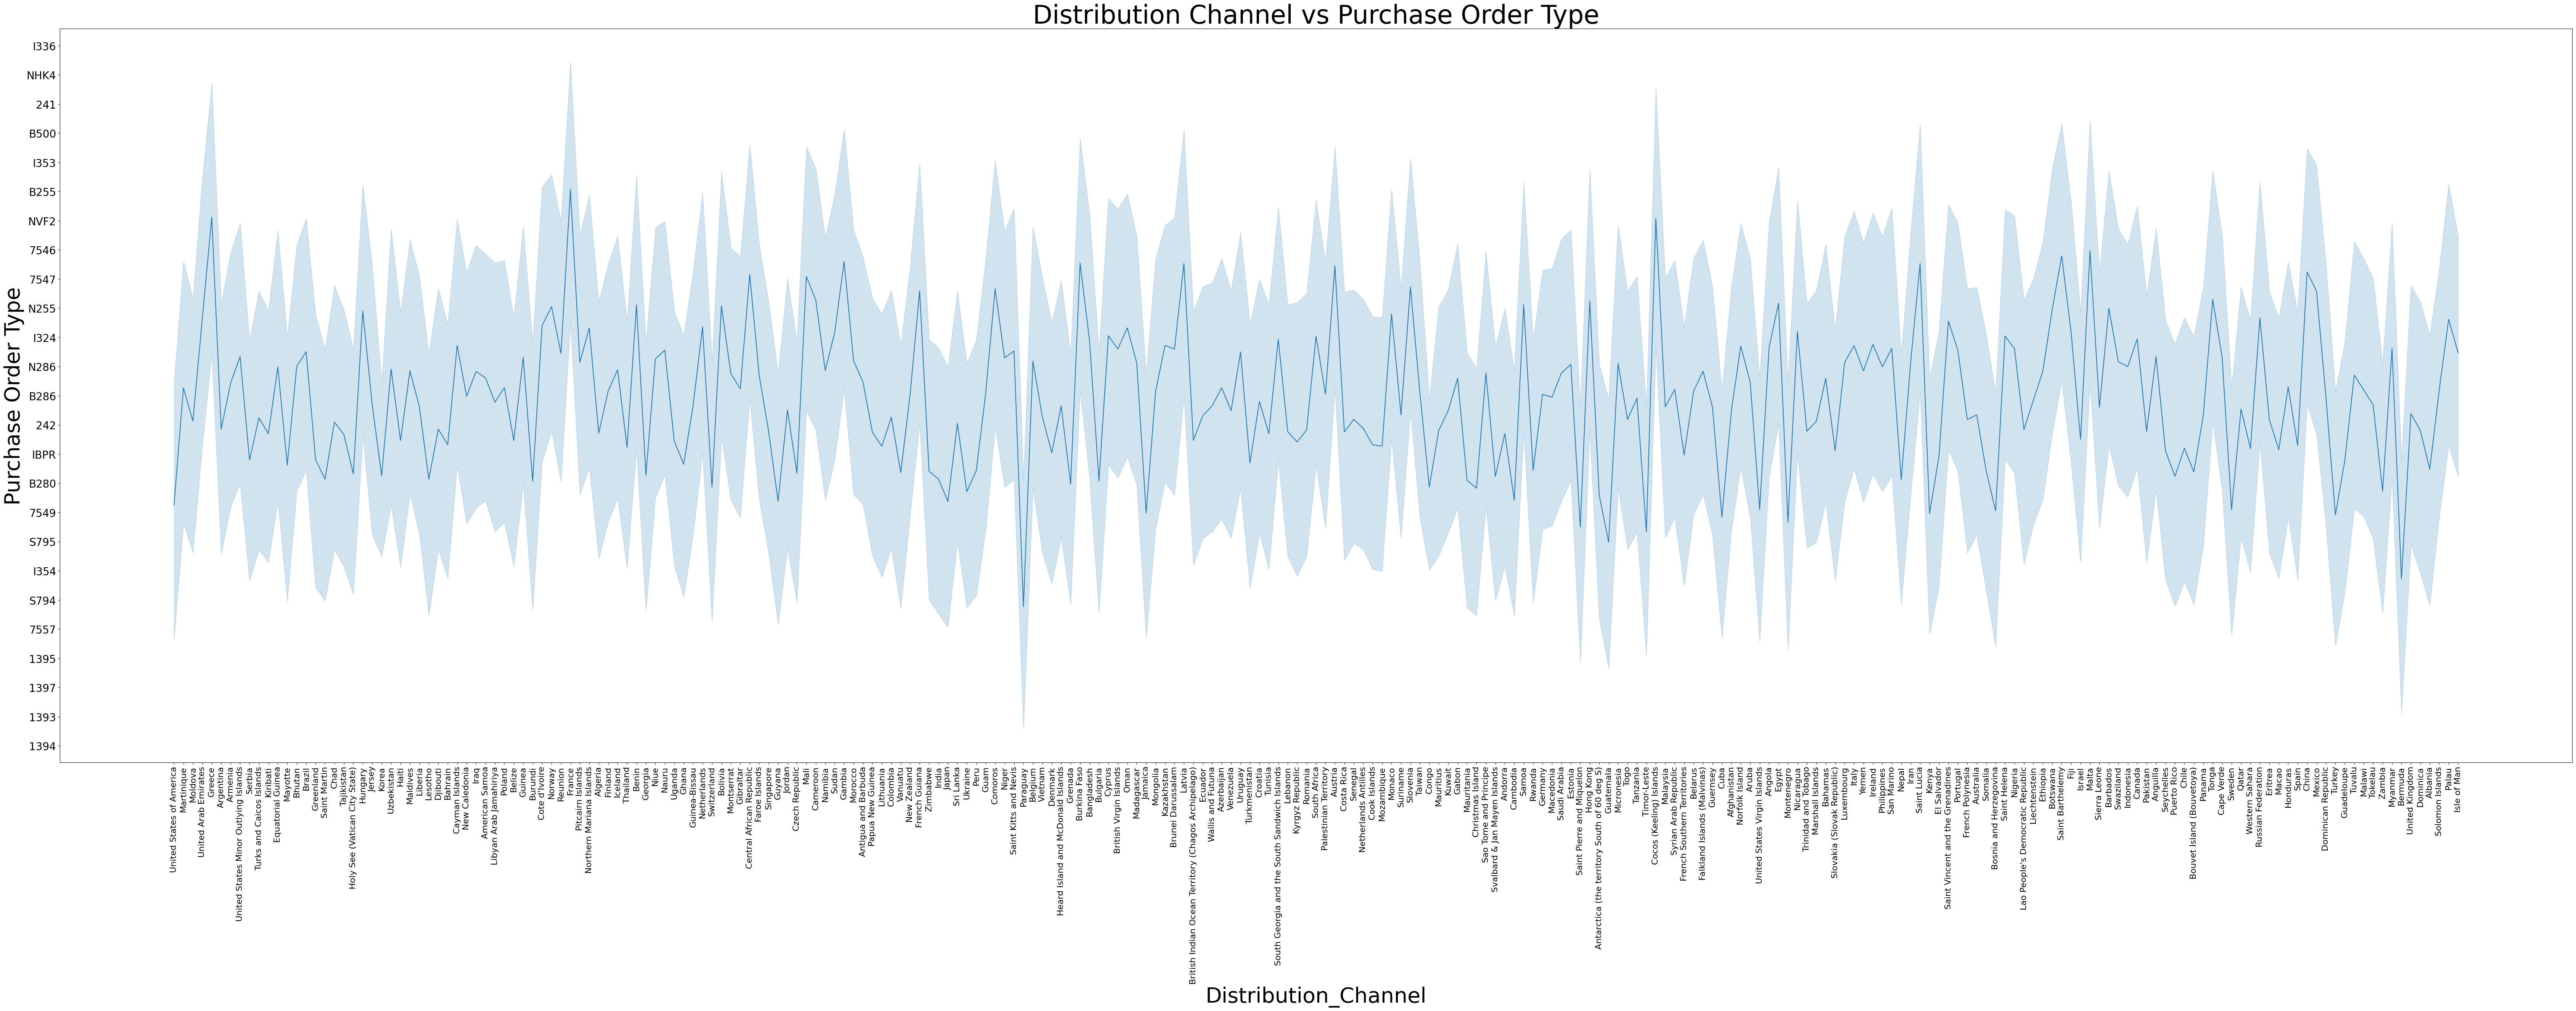

In [86]:
plt.figure(figsize=(85, 25))
plt.title("Distribution Channel vs Purchase Order Type", fontsize=48)

plt.xlabel("Distribution_Channel", fontsize=40)
plt.ylabel("Purchase Order Type", fontsize=40)
plt.xticks(fontsize = 16, rotation=90)
plt.yticks(fontsize = 20)

sns.lineplot(y = df['PURCHASE_ORDER_TYPE'], x = df['DISTRIBUTION_CHANNEL'])
plt.show()

4). Create a line plot on ORDER_CREATION_DATE and amount_in_usd


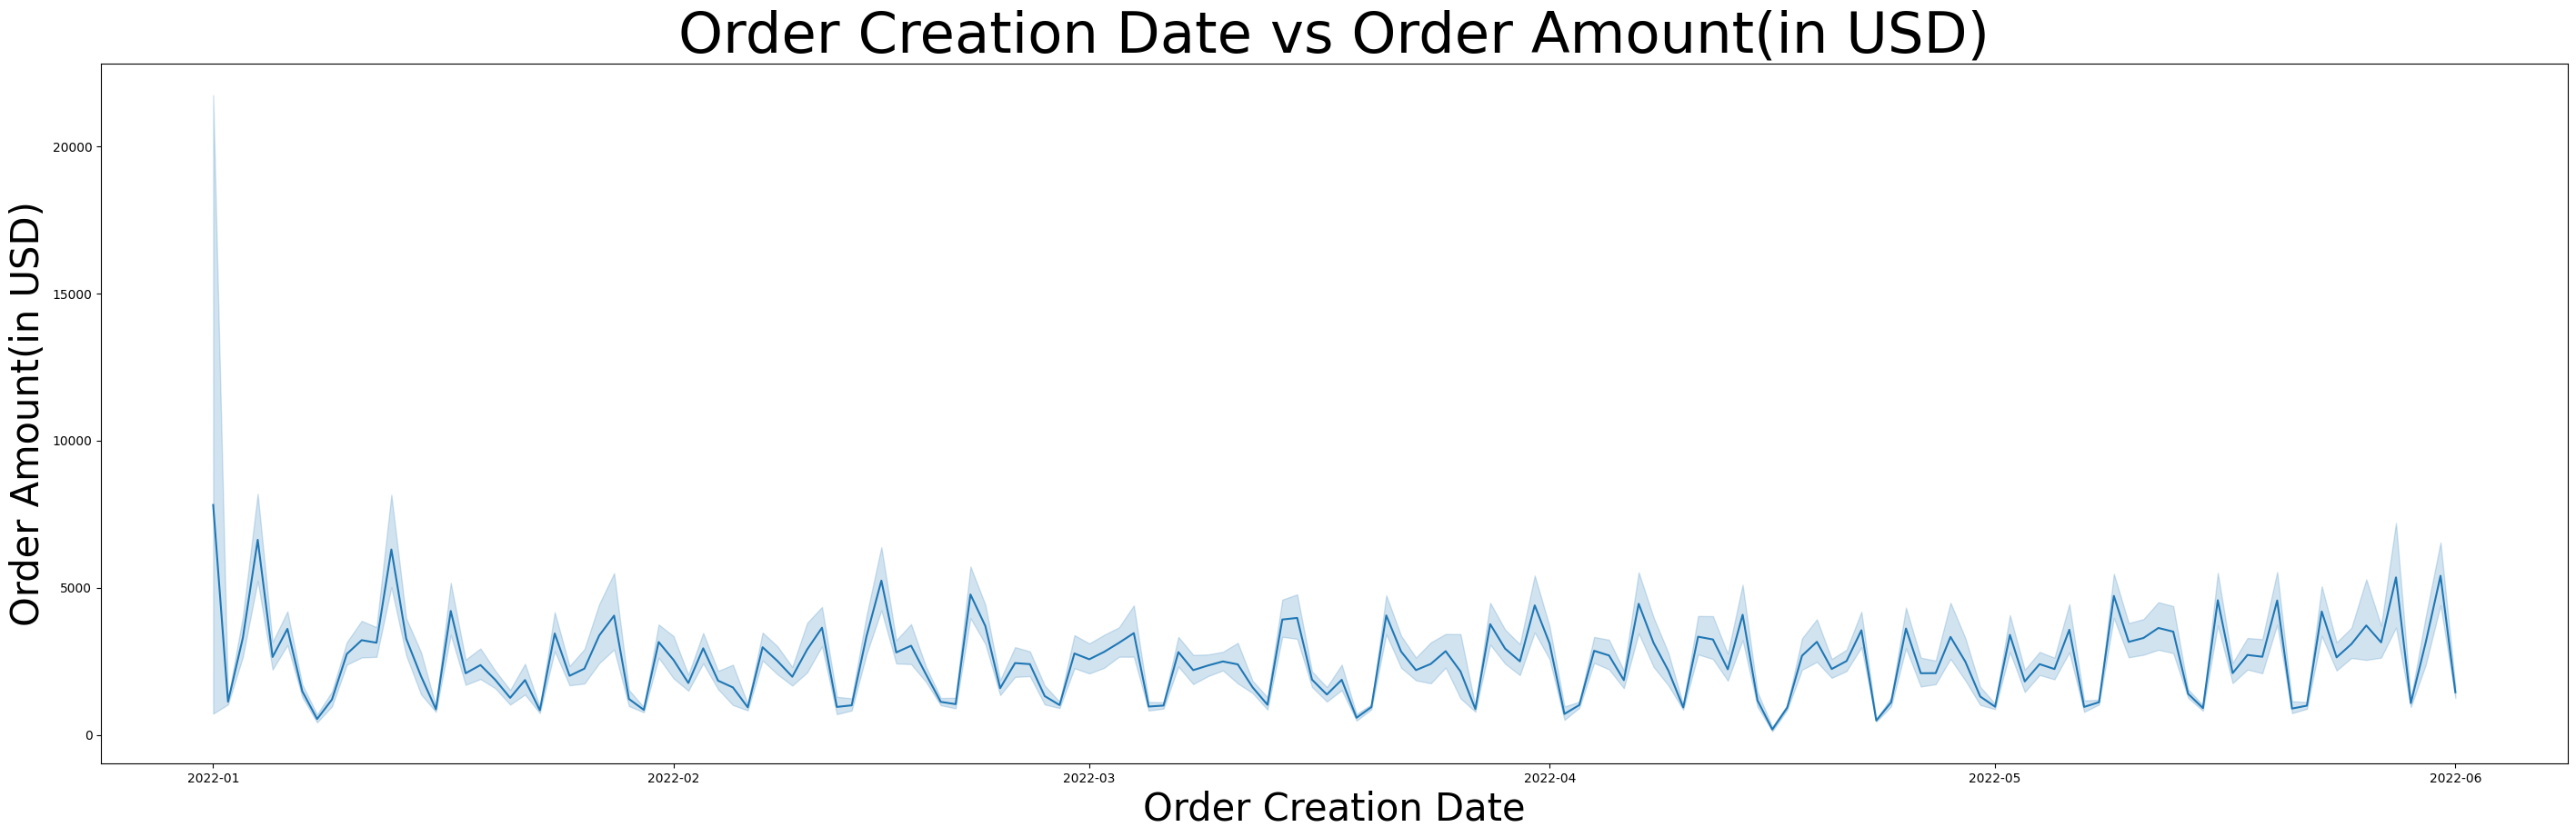

In [87]:
plt.figure(figsize=(35, 10))

plt.title("Order Creation Date vs Order Amount(in USD)", fontsize=45)
plt.xlabel("Order Creation Date", fontsize=30)
plt.ylabel("Order Amount(in USD)", fontsize=30)

sns.lineplot(x = "ORDER_CREATION_DATE", y = "AMOUNT_IN_USD", data = df)
plt.show()

5). Create a boxplot on ORDER_AMOUNT to find out the outliers

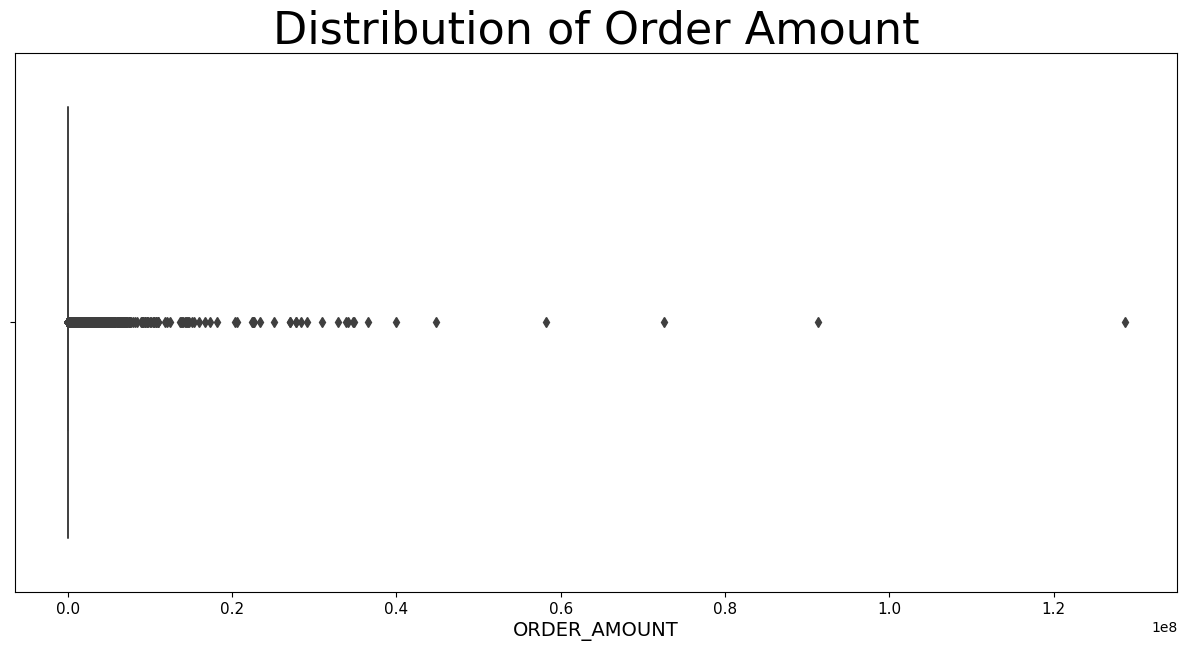

In [88]:
plt.figure(figsize=(15, 7))

plt.title("Distribution of Order Amount", fontsize=32)
plt.xlabel("Order Amount", fontsize=14)
plt.xticks(fontsize = 11)

sns.boxplot(x=df["ORDER_AMOUNT"].astype('float64'), linewidth=1.2, fliersize=5)
plt.show()

6). Create a barchart on COMPANY_CODE and ORDER_AMOUNT

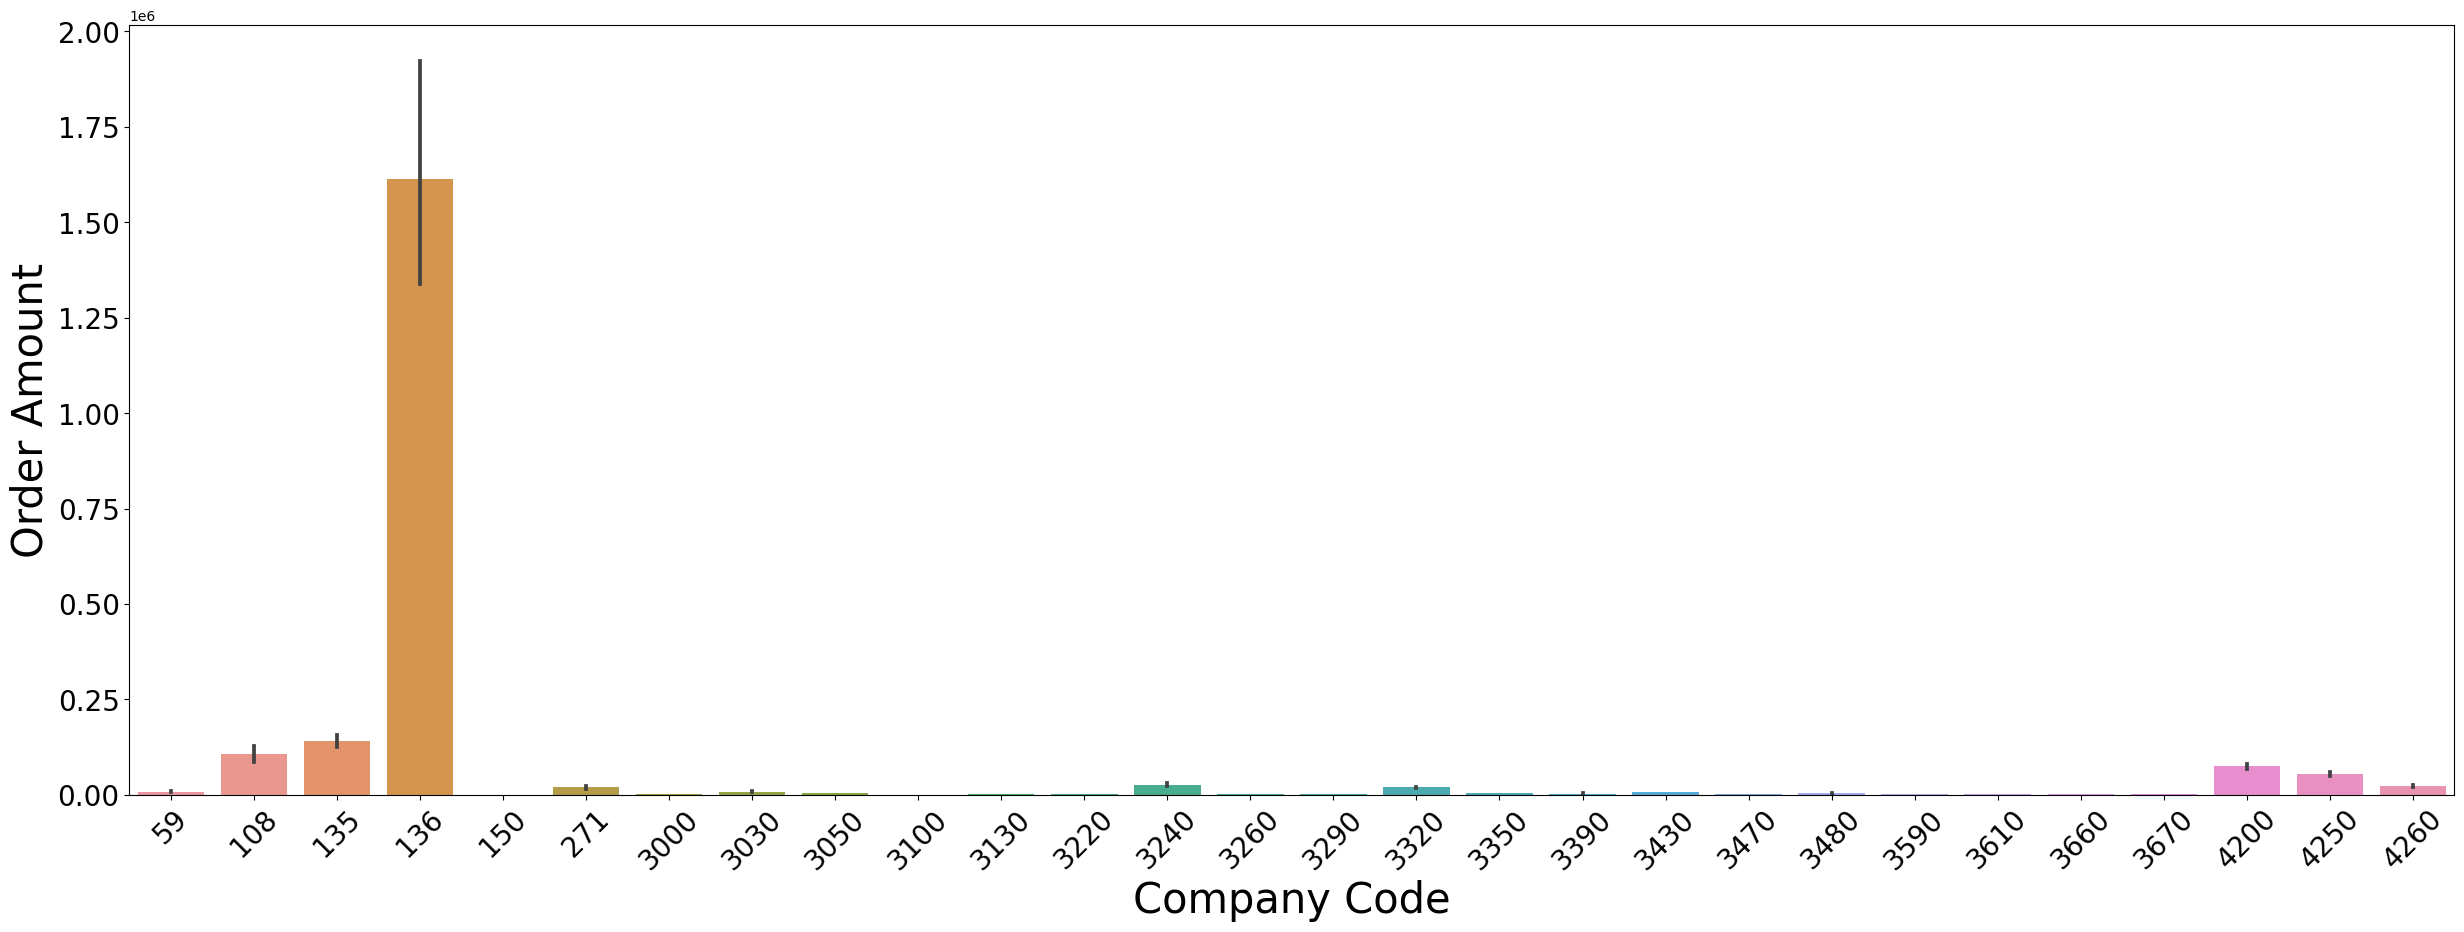

In [89]:
plt.figure(figsize=(30, 10))
sns.barplot(x = df["COMPANY_CODE"], y = df["ORDER_AMOUNT"].astype('float64'))

plt.xlabel("Company Code", fontsize=30)
plt.xticks(fontsize = 20, rotation = 45)
plt.ylabel("Order Amount", fontsize=30)
plt.yticks(fontsize = 20)

plt.show()

MILESTONE 3

In [90]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

1). Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

In [91]:
Q1 = df['AMOUNT_IN_USD'].quantile(0.25)
Q3 = df['AMOUNT_IN_USD'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = df[(df['AMOUNT_IN_USD'] < Q1 - threshold * IQR) | (df['AMOUNT_IN_USD'] > Q3 + threshold * IQR)]

median = df['AMOUNT_IN_USD'].median()
df['AMOUNT_IN_USD'] = np.where((df['AMOUNT_IN_USD'] < Q1 - threshold * IQR) | (df['AMOUNT_IN_USD'] > Q3 + threshold * IQR), median, df['AMOUNT_IN_USD'])
len(outliers)

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\49039472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMOUNT_IN_USD'] = np.where((df['AMOUNT_IN_USD'] < Q1 - threshold * IQR) | (df['AMOUNT_IN_USD'] > Q3 + threshold * IQR), median, df['AMOUNT_IN_USD'])


101257

2). Label encoding or One hot Encoding on all the categorical columns 

In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['CUSTOMER_ORDER_ID', 'SALES_ORG','DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE', 'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY', 'ORDER_CURRENCY', 'CUSTOMER_NUMBER', 'unique_cust_id']
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\3187224522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)


3). Log Transformations on continuous columns 

In [93]:
continuous_cols = ['RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT', 'CREDIT_STATUS', 'AMOUNT_IN_USD']
column_dtypes = df[continuous_cols].dtypes
numeric_convert=column_dtypes[column_dtypes != 'object'].index
df[numeric_convert] = np.log1p(df[numeric_convert])

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\3681067323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_convert] = np.log1p(df[numeric_convert])


4). Try to extract new features by grouping existing columns 

In [94]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'AMOUNT_IN_USD': ['max']
}).reset_index()
grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']
grouped_df

SALES_ORG  avg_order_amount  total_credit_value  unique_customers  \
0             0          4.495421          283.160495               141   
1             1          4.764598          249.581870               129   
2             2          4.760109          204.237289               116   
3             3          4.693573          200.751858               124   
4             4          4.564189          212.165680               137   
...         ...               ...                 ...               ...   
2406       2406          4.887688          205.043645               143   
2407       2407          4.784492          219.147287               122   
2408       2408          4.789962          247.437874               139   
2409       2409          4.757516          196.630961               146   
2410       2410          4.886547          180.805801               138   

      max_amount_usd  
0           7.472131  
1           7.501248  
2           7.497096  
3           7.494677  
4           7.498995  
...              ...  
2406        7.497897  
2407        7.475906  
2408        7.493813  
2409        7.488769  
2410        7.479977  

[2411 rows x 5 columns]

5). Create a heatmap to find correlation between the columns

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\4256401925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


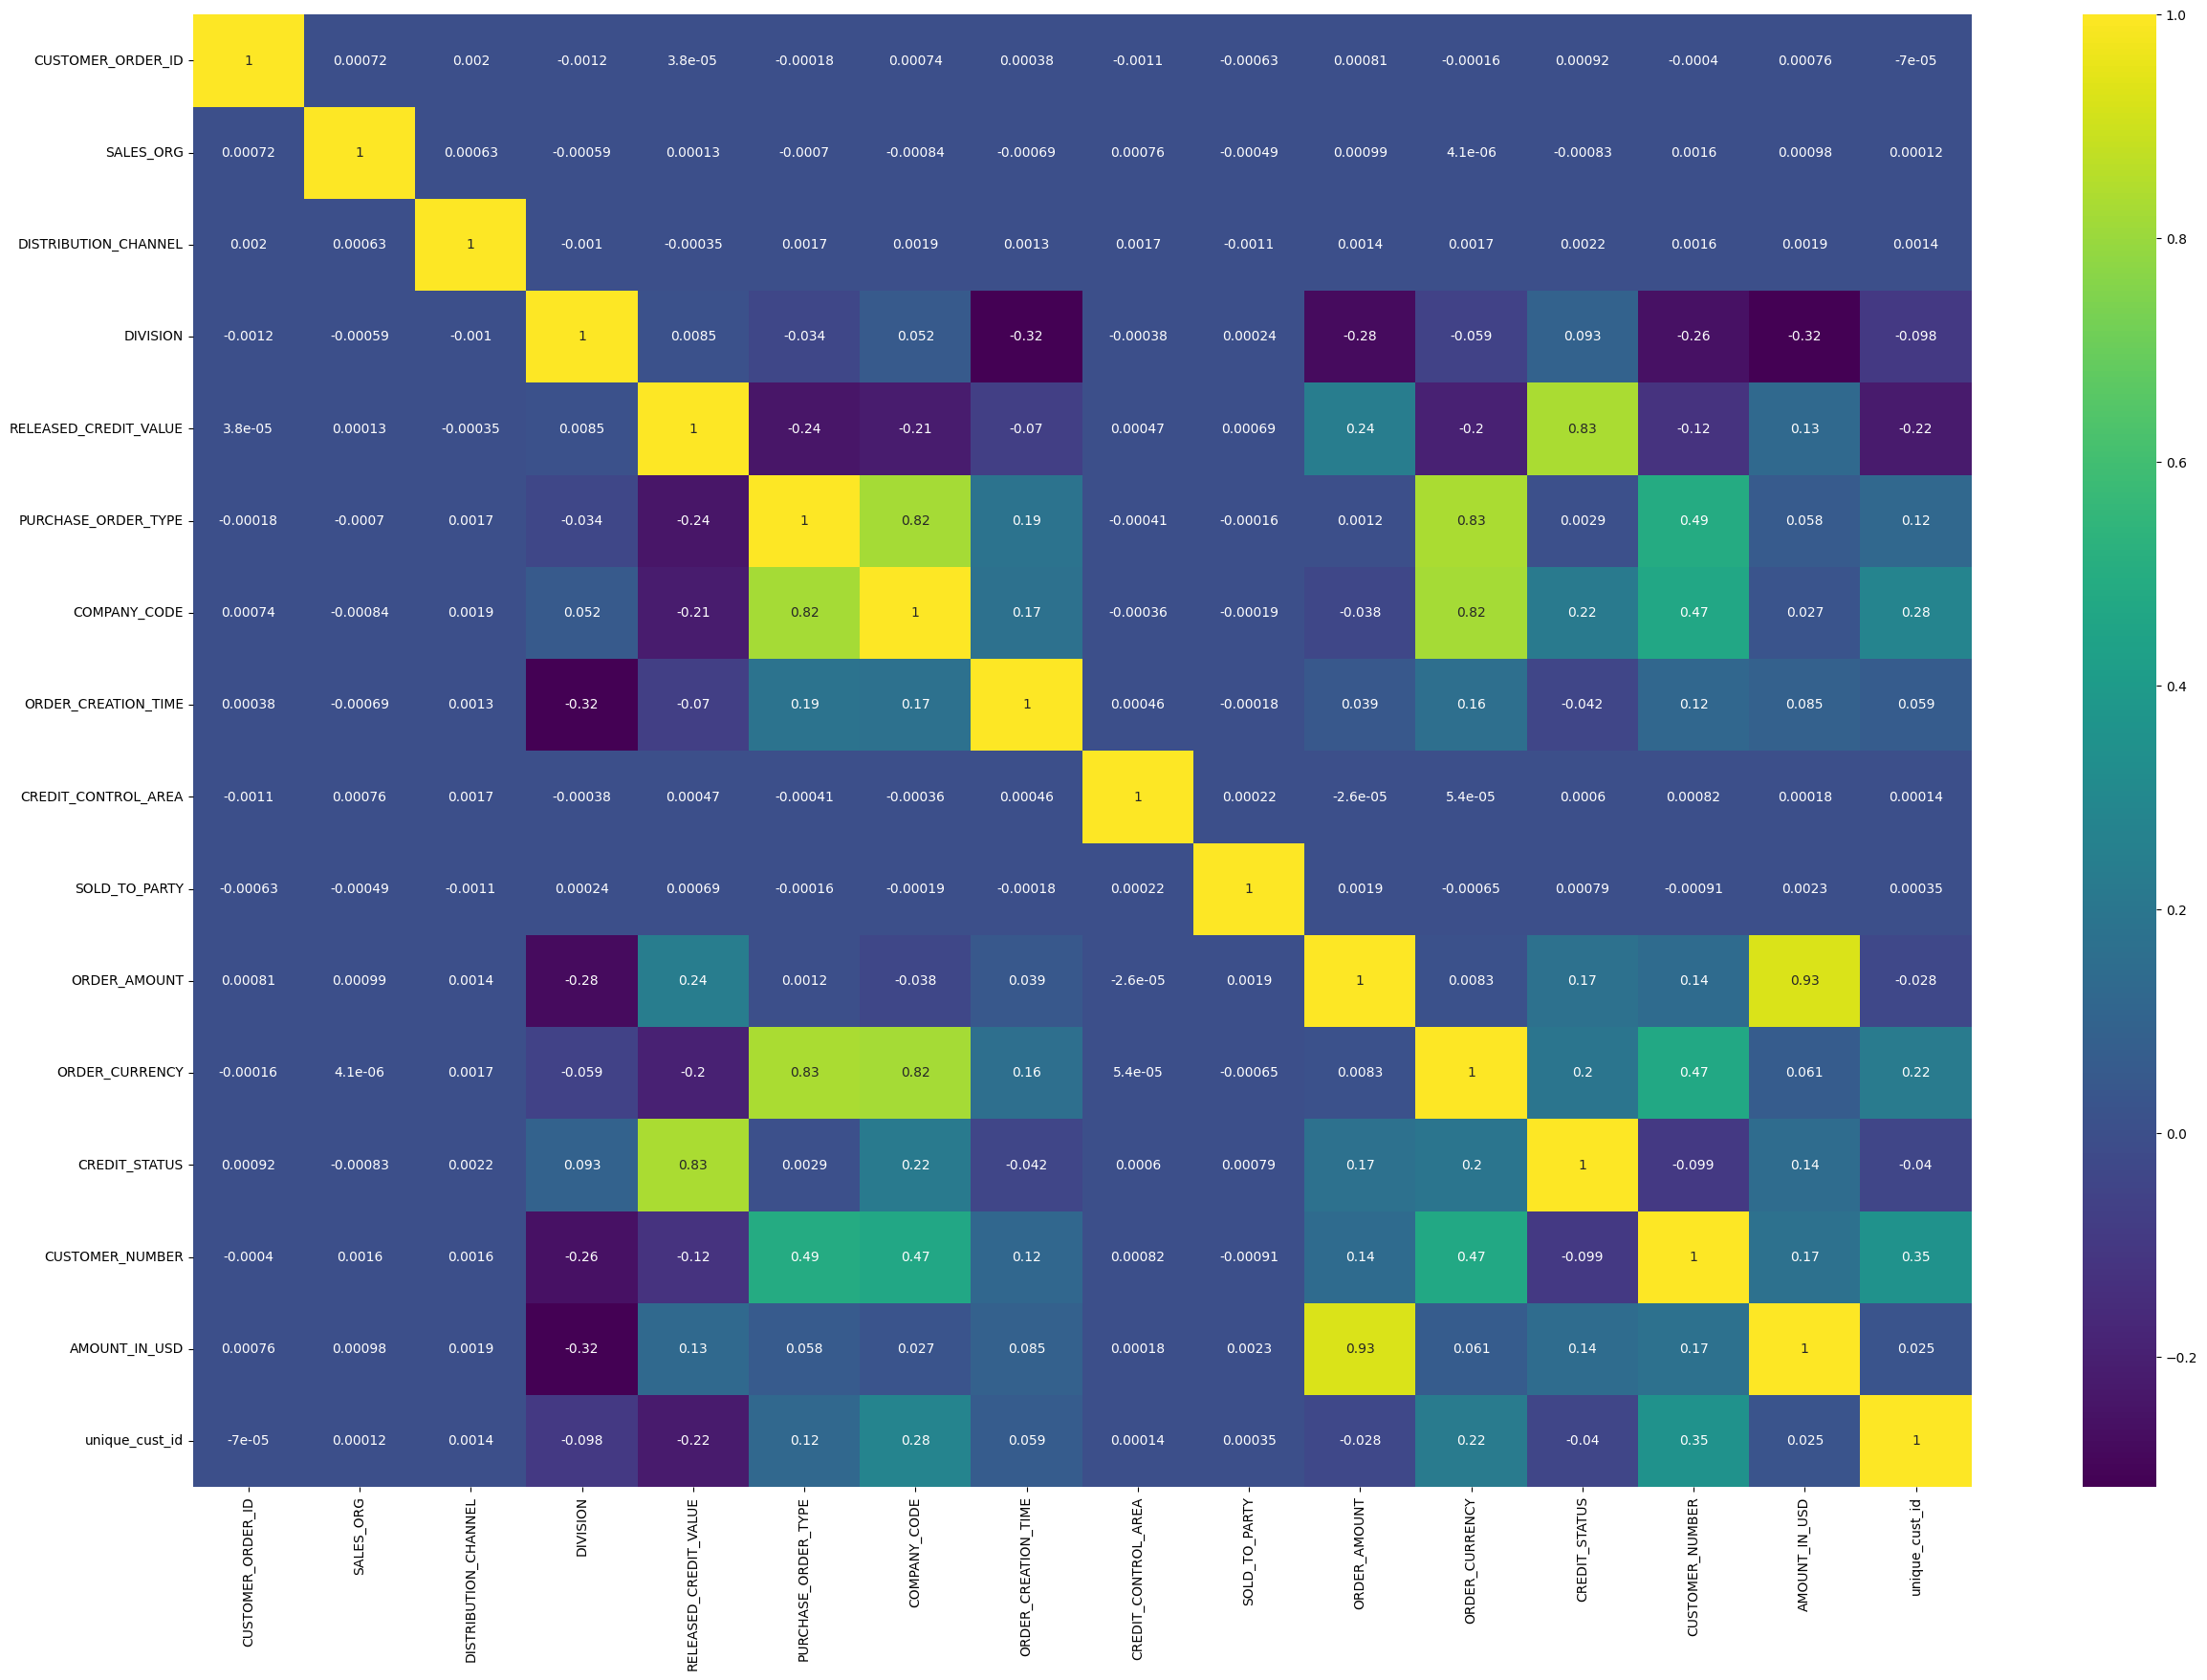

In [95]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

6). Try to identify important or relevant columns for feature extraction

In [96]:
corr_matrix = df.corr().abs()

high_corr_var = np.where(corr_matrix > 0.7)

high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\4240704900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'COMPANY_CODE'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('COMPANY_CODE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'AMOUNT_IN_USD')]


Introduction of a particular module for datetime manipulation

In [97]:
df['ORDER_CREATION_TIME'] = df['ORDER_CREATION_TIME'].astype('str').apply(lambda x: x.zfill(6))
creationtime = pd.to_datetime(df['ORDER_CREATION_TIME'], format='%H%M%S')

df['ORDER_CREATION_HOUR'] = creationtime.dt.hour
df['ORDER_CREATION_MINUTE'] = creationtime.dt.minute
df['ORDER_CREATION_SECOND'] = creationtime.dt.second


df['ORDER_CREATION_DAY'] = df['ORDER_CREATION_DATE'].dt.day
df['ORDER_CREATION_MONTH'] = df['ORDER_CREATION_DATE'].dt.month
df['ORDER_CREATION_YEAR'] = df['ORDER_CREATION_DATE'].dt.year
df['REQUESTED_DELIVERY_DAY'] = df['REQUESTED_DELIVERY_DATE'].dt.day
df['REQUESTED_DELIVERY_MONTH'] = df['REQUESTED_DELIVERY_DATE'].dt.month
df['REQUESTED_DELIVERY_YEAR'] = df['REQUESTED_DELIVERY_DATE'].dt.year

df.head(4)

C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\1810085277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_CREATION_TIME'] = df['ORDER_CREATION_TIME'].astype('str').apply(lambda x: x.zfill(6))
C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\1810085277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_CREATION_HOUR'] = creationtime.dt.hour
C:\Users\stuti\AppData\Local\Temp\ipykernel_3972\1810085277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0             844220       1437                   232         1   
1             916445       1349                   135         1   
2             954351       1138                   141         1   
3               3878       1811                   228         1   

   RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0               0.000000                    0            11   
1               0.000000                    0            11   
2              11.318649                  204            13   
3               7.294540                  255            14   

  ORDER_CREATION_DATE ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  ...  \
0          2022-01-01              043012                    5  ...   
1          2022-01-01              043114                    2  ...   
2          2022-01-01              110019                    0  ...   
3          2022-01-01              153013                    5  ...   

   unique_cust_id  ORDER_CREATION_HOUR ORDER_CREATION_MINUTE  \
0            6608                    4                    30   
1            6608                    4                    31   
2            4405                   11                     0   
3            4059                   15                    30   

   ORDER_CREATION_SECOND  ORDER_CREATION_DAY  ORDER_CREATION_MONTH  \
0                     12                   1                     1   
1                     14                   1                     1   
2                     19                   1                     1   
3                     13                   1                     1   

   ORDER_CREATION_YEAR  REQUESTED_DELIVERY_DAY  REQUESTED_DELIVERY_MONTH  \
0                 2022                      13                         1   
1                 2022                      11                         1   
2                 2022                      12                         1   
3                 2022                       6                         1   

   REQUESTED_DELIVERY_YEAR  
0                     2022  
1                     2022  
2                     2022  
3                     2022  

[4 rows x 27 columns]

In [98]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop = True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

In [99]:
lags = 5
ffday = 1
datetime_cols = 'ORDER_CREATION_DATE'
customer_id_col = 'CUSTOMER_NUMBER'
net_amount_col = 'ORDER_AMOUNT'

# Apply the difference_in_days function to the date-time columns
df = difference_in_days(df_modified, lags, ffday, customer_id_col, datetime_cols, net_amount_col)

df

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                  954351       1138                   141         1   
1                    3878       1811                   228         1   
2                  771649        281                    82         1   
3                  289006       1505                     9         1   
4                  557845       1545                    10         0   
...                   ...        ...                   ...       ...   
211322             648079       2216                   232         0   
211323             524135        186                    61         0   
211324             447658        732                    90         0   
211325             133128       1954                   208         0   
211326             275527       1634                     9         0   

        RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                   11.318649                  204            13   
1                    7.294540                  255            14   
2                    0.000000                  255            14   
3                    0.000000                  270            14   
4                    0.000000                  291            19   
...                       ...                  ...           ...   
211322               0.000000                  104             6   
211323               0.000000                  104             6   
211324               0.000000                  104             6   
211325               0.000000                  104             6   
211326               0.000000                  104             6   

       ORDER_CREATION_DATE ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  ...  \
0               2022-01-01              110019                    0  ...   
1               2022-01-01              153013                    5  ...   
2               2022-01-01              160020                    4  ...   
3               2022-01-01              160023                    3  ...   
4               2022-01-02              110022                    3  ...   
...                    ...                 ...                  ...  ...   
211322          2022-06-01              211212                    2  ...   
211323          2022-06-01              220007                    1  ...   
211324          2022-06-01              220008                    1  ...   
211325          2022-06-01              220040                    2  ...   
211326          2022-06-01              220103                    2  ...   

        Last-1day_Sales  Last-2day_Sales Last-3day_Sales  Last-4day_Sales  \
0              0.000000         0.000000        0.000000         0.000000   
1              0.000000         0.000000        0.000000         0.000000   
2              0.000000         0.000000        0.000000         0.000000   
3              0.000000         0.000000        0.000000         0.000000   
4              0.000000         0.000000        0.000000         0.000000   
...                 ...              ...             ...              ...   
211322         8.009393         7.351017        7.294432         8.046703   
211323         9.687392         9.968704        8.916050        12.265232   
211324         9.277244         7.435108       11.278897        11.074737   
211325        11.463187         9.277244        7.435108        11.278897   
211326        11.108396        11.463187        9.277244         7.435108   

        Last-5day_Sales  Last-1day_Diff  Last-2day_Diff  Last-3day_Diff  \
0              0.000000        0.000000        0.000000        0.000000   
1              0.000000        0.000000        0.000000        0.000000   
2              0.000000        0.000000        0.000000        0.000000   
3              0.000000        0.000000        0.000000        0.000000   
4              0.000000        0.000000        0.000000        0.000000   
...                 ...             ..

MILESTONE 4 - ML MODELS AND EVALUATIONS

In [ ]:
X = df.drop(['AMOUNT_IN_USD', 'ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE', 'ORDER_AMOUNT'], axis=1).astype('float')
Y = df['AMOUNT_IN_USD']

1). Modify the dataset to pass into any type of machine learning models. 

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 45)

2). Try different machine learning models like:- Linear Regression, Support Vector Machine, Decision Tree, Random Forest, AdaBoost, Xgboost etc. 

3). Perform Regression model evaluations like MSE, RMSE, R-Square etc.

NOTE: Here I have performed both question 2 and 3 together for better understanding of each model

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse_linear = mean_squared_error(Y_test, Y_pred)
rmse_linear = mean_squared_error(Y_test, Y_pred, squared=False)
r2_test_score_linear = r2_score(Y_test, Y_pred)
r2_train_score_linear = r2_score(Y_train, model.predict(X_train))

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared for testing data:", r2_test_score_linear)
print("R-squared for training data:", r2_train_score_linear)

Linear Regression:
Mean Squared Error: 2.438108671314302
Root Mean Squared Error: 1.5614444182596774
R-squared for testing data: 0.4729756876956486
R-squared for training data: 0.4710342378267761


In [104]:
# from sklearn.svm import SVR
# from math import sqrt
# svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_model.fit(X_train, Y_train)

# y_pred = svr_model.predict(X_test)
# subset_size = 1000
# X_subset = X[:250]
# Y_subset = Y[:250]
# # Evaluate model performance
# mse = mean_squared_error(Y_test, y_pred)
# rmse = sqrt(mse)
# r2 = r2_score(Y_test, y_pred)

# # Print model performance metrics
# print("Mean Squared Error (MSE): {:.2f}".format(mse))
# print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
# print("R-Squared (R2): {:.2f}".format(r2))

In [105]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(max_depth=15, random_state=42)

decision_tree_model.fit(X_train, Y_train)

y_pred = decision_tree_model.predict(X_test)

mse_tree = mean_squared_error(Y_test, Y_pred)
rmse_tree = np.sqrt(mse_tree)
r2_test_score_tree = r2_score(Y_test, y_pred)
r2_train_score_tree = r2_score(Y_train, decision_tree_model.predict(X_train))

print("Decision Tree:")
print("Mean Squared Error (MSE): {:.2f}".format(mse_tree))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_tree))
print("R-Squared Score for testing data: {:.2f}".format(r2_test_score_tree))
print("R-squared score for training data: {:.2f}".format(r2_train_score_tree))

Decision Tree:
Mean Squared Error (MSE): 2.44
Root Mean Squared Error (RMSE): 1.56
R-Squared Score for testing data: 0.74
R-squared score for training data: 0.47


In [129]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()

random_forest_model.fit(X_train, Y_train)

y_pred = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(Y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_test_score_rf = r2_score(Y_test, y_pred)
r2_train_score_rf = r2_score(Y_train, random_forest_model.predict(X_train))

print("Random Forest: ")
print("Mean Squared Error (MSE): {:.2f}".format(mse_rf))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_rf))
print("R-Squared Score for testing data: {:.2f}".format(r2_test_score_rf))
print("R-Squared Score for training data: {:.2f}".format(r2_train_score_rf))

In [131]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, Y_train)
y_pred = adaboost_model.predict(X_test)

mse_ada = mean_squared_error(Y_test, y_pred)
rmse_ada = np.sqrt(mse_ada)
r2_test_score_ada = r2_score(Y_test, y_pred)
r2_train_score_ada = r2_score(Y_train, adaboost_model.predict(X_train))

print("AdaBoost:")
print("MSE:", mse_ada)
print("RMSE:", rmse_ada)
print("R-Square for testing data:", r2_test_score_ada)
print("R-Square for training data:", r2_train_score_ada)

AdaBoost:
MSE: 2.6126363807098922
RMSE: 1.616365175543538
R-Square for testing data: 0.4352495817576876
R-Square for training data: 0.43306272309058236


In [132]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(Y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_test_score_xgb = r2_score(Y_test, y_pred)
r2_train_score_xgb = r2_score(Y_train, xgb_model.predict(X_train))

print("XGBoost:")
print("Mean Squared Error (MSE): ", mse_xgb)
print("Root Mean Squared Error (RMSE): ", rmse_xgb)
print("R-squared (R2) for testing data: ", r2_test_score_xgb)
print("R-squared (R2) for training data: ", r2_train_score_xgb)

XGBoost:
Mean Squared Error (MSE):  0.8989057681957269
Root Mean Squared Error (RMSE):  0.9481064118524496
R-squared (R2) for testing data:  0.805691518231471
R-squared (R2) for training data:  0.853419256026999


4). Compare the accuracies of all the models 

In [133]:
evaluation_metrics = {
    'Linear Regression': [mse_linear, rmse_linear, r2_test_score_linear, r2_train_score_linear],
    'Decision Tree': [mse_tree, rmse_tree, r2_test_score_tree, r2_train_score_tree],
    'Random Forest': [mse_rf, rmse_rf, r2_test_score_rf, r2_train_score_rf],
    'XGBoost': [mse_xgb, rmse_xgb, r2_test_score_xgb, r2_train_score_xgb],
    'AdaBoost': [mse_ada, rmse_ada, r2_test_score_ada, r2_train_score_ada]
    # 'Support Vector Machine': [mse_svm, rmse_svm, r2_svm]
}

print("Evaluation Metrics:")
print("{:<20} {:<15} {:<15} {:<15} {:<15}".format('Model', 'MSE', 'RMSE', 'R-Square Test', 'R-Square Train'))
for model, metrics in evaluation_metrics.items():
    mse, rmse, r2_test, r2_train = metrics
    print("{:<20} {:<15.2f} {:<15.2f} {:<15.11f} {:<15.11f}".format(model, mse, rmse, r2_test, r2_train))

Evaluation Metrics:
Model                MSE             RMSE            R-Square Test   R-Square Train 
Linear Regression    2.44            1.56            0.47297568770   0.47103423783  
Decision Tree        2.44            1.56            0.74114228556   0.47103423783  
Random Forest        0.86            0.93            0.81451375385   0.97393282696  
XGBoost              0.90            0.95            0.80569151823   0.85341925603  
AdaBoost             2.61            1.62            0.43524958176   0.43306272309  


5). Select the best possible model

In [144]:
best_model = max(evaluation_metrics, key=lambda x: evaluation_metrics[x][2])
best_model_r2 = evaluation_metrics[best_model][2]

df['best_model'] = best_model
df['best_model_r2'] = best_model_r2

print("The highest R-square value is {} of the {} Regression Model".format(best_model_r2, best_model))

The highest R-square value is 0.814513753845475 of the Random Forest Regression Model


6). Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


In [156]:
from sklearn.model_selection import GridSearchCV

# Define the parameters to tune the model
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features':['auto', 'sqrt', 'log2']
}

random_forest_model = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='r2', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator and its predictions
best_randomforest_model = grid_search.best_estimator_
best_parameter = grid_search.best_parameter_

7). Come up with the best possible model accuracy.

In [154]:
best_model.fit(X, Y)

Y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(Y_test, Y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(Y_test, Y_pred_best)

print("Best Model after hyperparameter tuning:")
print("MSE:", mse_best)
print("RMSE:", rmse_best)
print("R-Squared:", r2_score)


Best Model after hyperparameter tuning:
MSE: 0.6431697636271635
RMSE: 0.801978655343871
R-Squared: 0.82643281902
